In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
# from sklearn.inspection import plot_partial_dependence
import sklearn.metrics

In [54]:
def get_economic_scores():
    df = pd.read_csv ('Economic_Freedom.csv')
    df.head()
    df.columns
    df = df[df['year'] == 2015]
    df = df.drop(['1a_government_consumption', 'year', 'ISO_code', '1b_transfers', '1c_gov_enterprises',
           '1d_top_marg_tax_rate', '1_size_government', '2a_judicial_independence',
           '2b_impartial_courts', '2c_protection_property_rights',
           '2d_military_interference', '2e_integrity_legal_system',
           '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property',
           '2h_reliability_police', '2i_business_costs_crime',
           '2j_gender_adjustment', '2_property_rights', '3a_money_growth',
           '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency',
           '3_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers',
           '4c_black_market', '4d_control_movement_capital_ppl', '4_trade',
           '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg',
           '5_regulation', 'rank', 'quartile'], axis=1)
    df = df.rename(columns = {"countries":"Country"})
    return df

In [55]:
def get_life_expectancy():
    df = pd.read_csv ('Life_Expectancy_Data.csv')
    df.head()
    df.columns
    df = df[df['Year'] == 2015]
    df = df.drop(['Status', 'Year', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
           'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
           'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
           ' thinness  1-19 years', ' thinness 5-9 years',
           'Income composition of resources', 'Schooling'], axis=1)
    return df


In [56]:
'''
Renders a simple (x,y) plot. 
@param x (numpy.ndarray) - average number of rooms 
       y (numpy.ndarray) - median price of house 
'''
def simple_plot(x,y):
    plt.scatter(x,y)
    plt.title('Countries Around the World')
    plt.xlabel('Economic Freedom Score (1-10)')
    plt.ylabel('Life Expectancy (years)')
    plt.show()

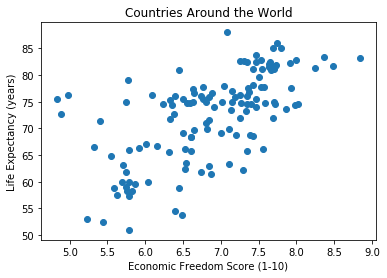

In [57]:
#TODO
# Run the functions here.
life_expectancy =  get_life_expectancy()
economic_scores = get_economic_scores()
   
df3 = pd.merge(life_expectancy, economic_scores, how='inner', on = 'Country')

# print(df3[["ECONOMIC FREEDOM"]])

life_expect_list = df3[["Life expectancy "]]
econ_score_list = df3[["ECONOMIC FREEDOM"]]

simple_plot(econ_score_list, life_expect_list)

In [58]:
def plot_actual_vs_pred(test_x, test_y, pred_y):
    predicted = plt.scatter(test_x, test_y, color='blue')
    actual = plt.scatter(test_x, pred_y, color='red')
    plt.title('Average Number of Rooms vs. Actual Median House Price and Predicted Price')
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Median House Prices')
    plt.legend((predicted, actual), ('Actual', 'Predicted'), scatterpoints = 1, loc = 'upper left')
    plt.show()
    return

In [60]:
X_train, X_test, y_train, y_test = train_test_split(econ_score_list, life_expect_list, 
                                                    test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)

plot_actual_vs_pred(X_test, y_test, y_pred)

r2_score = sklearn.metrics.r2_score(y_test, y_pred)
print("r^2 score: ", r2_score)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').